###**Actividad Semanal - 4**

###**Maestría en Inteligencia Artificial Aplicada**
###**Curso: Ciencia y analítica de datos (Gpo 10)**
####**Tecnológico de Monterrey**
####**Fecha: 11 de octubre del 2022**
####**Profesor:Jobish Vallikavungal Devassia**

###**Nombre del estudiante: Jaime Andres Palacios Campaña**
###**Matrícula: A01794023**

###**Nombre del estudiante: Daniela Parra García**
###**Matrícula: A01633687**

## Parte 1: Ejercicio guiado

In [ ]:
import pandas as pd
import numpy as np

path = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

In [ ]:
path_df = pd.read_csv(path,
                      index_col=0 #este parametro nos permite eliminar lo datos de la columna ID ya que no es necesaria
                      )

path_df.index.name = None #Esto nos permite eliminar el titulo de la columna ID

#Copiamos el dataframe con los datos originales para tener su backup.
df = path_df.copy()


#Nos llevamos todos los valores vacíos. De lo contrario, nos va a dar un error cuando apliquemos el PCA
df.dropna(axis = 0, inplace=True)

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


Primero, nos interesa saber cuáles son las variables numéricas (también llamadas continuas) de nuestro conjunto de datos. Esto porque la técnica PCA solo trabaja con variables continuas y no categóricas.


In [ ]:
df.info() #info es un método que muestra cuantas filas de datos hay, cuantas columnas y el tipo de dato de cada columna.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      29958 non-null  int64  
 1   X2      29958 non-null  float64
 2   X3      29958 non-null  float64
 3   X4      29958 non-null  float64
 4   X5      29958 non-null  float64
 5   X6      29958 non-null  float64
 6   X7      29958 non-null  float64
 7   X8      29958 non-null  float64
 8   X9      29958 non-null  float64
 9   X10     29958 non-null  float64
 10  X11     29958 non-null  float64
 11  X12     29958 non-null  float64
 12  X13     29958 non-null  float64
 13  X14     29958 non-null  float64
 14  X15     29958 non-null  float64
 15  X16     29958 non-null  float64
 16  X17     29958 non-null  float64
 17  X18     29958 non-null  float64
 18  X19     29958 non-null  float64
 19  X20     29958 non-null  float64
 20  X21     29958 non-null  float64
 21  X22     29958 non-null  float64
 22

En este conjunto de datos tenemos un total de 29958 filas de información (entradas), esto luego haber eliminado las entradas con datos vacios. Vemos que solo la primera columna: "x1" es de tipo *int64*, el resto de columnas son de tipo *float64*, aún así, continuan siendo variables numericas (continuas) lo cual no afectara el PCA. Eso significa que hay un total de 24 variables numéricas.

Antes de iniciar con el análisis de las variables entre si, mediante una gráfica de boxplot identificaremos los valores atípicos para proceder con su respectivo tratamiento y asi, no afectar el resultado del PCA. Sin embargo, como podemos observar en la información de las columnas, podemos darnos cuenta que hay algunas columnas que son categoricas por lo cual las excluiremos del analsis.

Ahora revisemos la correlación entre las variables.

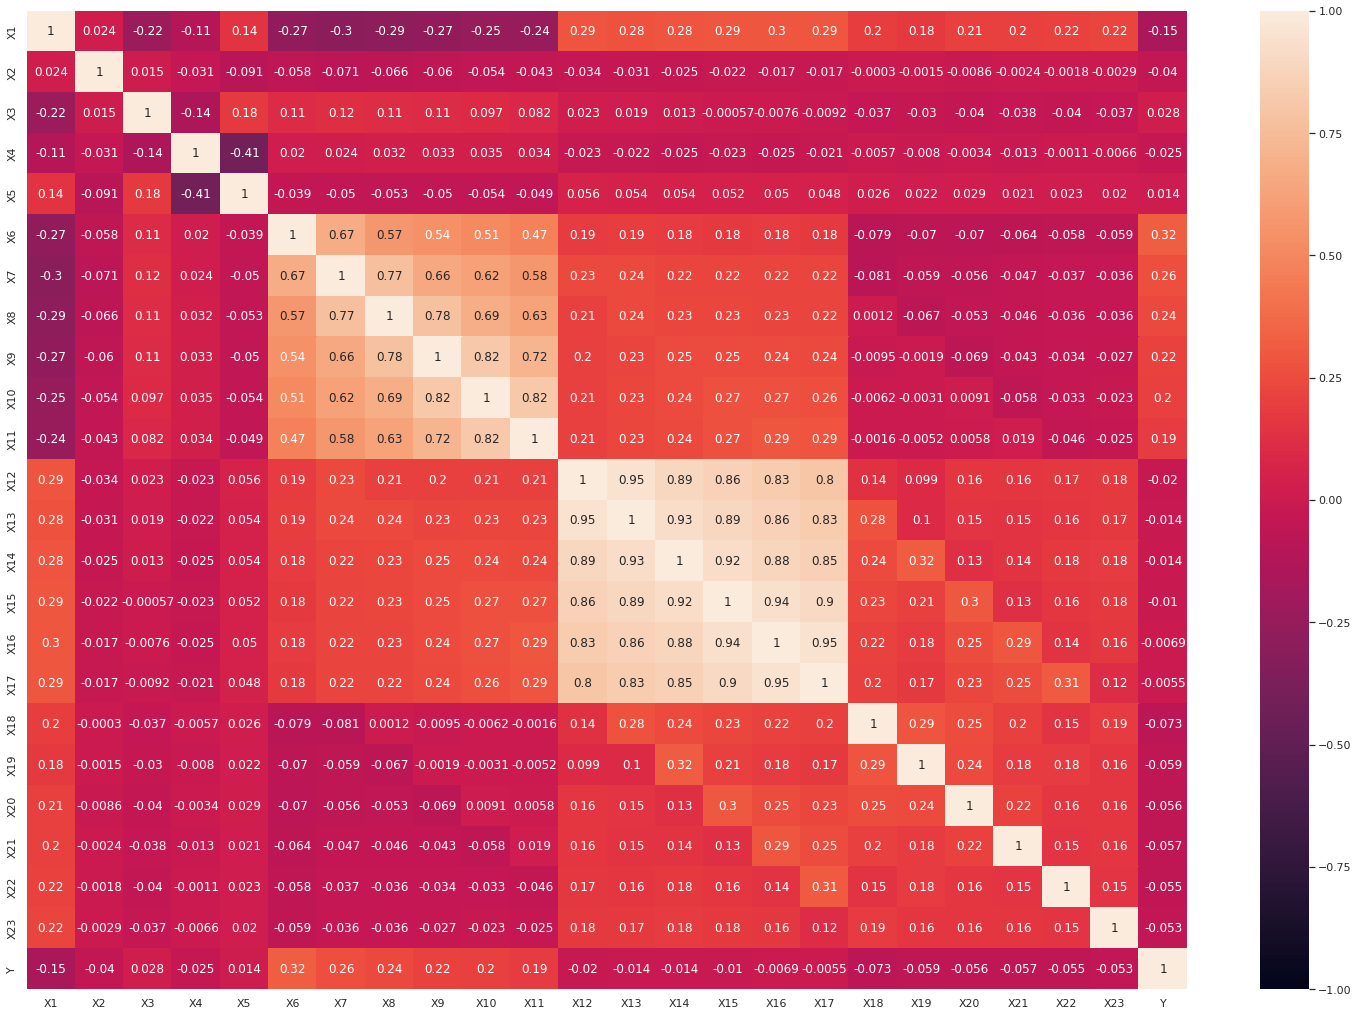

In [ ]:
#Graficar la correlación nos da un mejor entendimiento
import seaborn as sns
corr = df.corr()
sns.set(rc = {'figure.figsize':(26,18)})
sns.heatmap(corr, vmin = -1, vmax = 1, annot= True)


De la tabla anterior podemos ver que las casillas con morado oscuro o de color blanco son las que están mayor correlacionadas.

*   X12
* X13
* X14
* X15
* X16
* X17



Ahora revisaremos la varianza, el valor mínimo y el valor máximno en las columnas más correlacionadas.

In [ ]:
columnas = ['X12','X13','X14','X15','X16','X17']

resumen = {
    "Varianzas": df[columnas].var()[0:6],
    "Valor Min": df[columnas].min()[0:6],
    "Valor Max": df[columnas].max()[0:6]
}

pd.DataFrame(resumen, index = columnas).transpose()

,X12,X13,X14,X15,X16,X17
Varianzas,5.427998e+09,5.071040e+09,4.814312e+09,4.142813e+09,3.699829e+09,3.550120e+09
Valor Min,-1.655800e+05,-6.977700e+04,-1.572640e+05,-1.700000e+05,-8.133400e+04,-3.396030e+05
Valor Max,9.645110e+05,9.839310e+05,1.664089e+06,8.915860e+05,9.271710e+05,9.616640e+05


Analizando lo anterior, se podría entender mejor si mostramos la varianza en porcentajes respecto a la varianza total.

In [ ]:
#Calculamos la varianza total
t = df.var().sum()

#Calculamos la varianza en cada columna
var_x12 = df.X12.var()
var_x13 = df.X13.var()
var_x14 = df.X14.var()
var_x15 = df.X15.var()
var_x16 = df.X16.var()
var_x17 = df.X17.var()

#Mostramos los resultados en porcentajes
print('Varianza Total \t\t:',t.round(2) )
print('Varianza X12 \t\t:', ((var_x12/t)*100).round(2),'%' )
print('Varianza X13 \t\t:', ((var_x13/t)*100).round(2),'%' )
print('Varianza X14 \t\t:', ((var_x14/t)*100).round(2),'%' )
print('Varianza X15 \t\t:', ((var_x15/t)*100).round(2),'%' )
print('Varianza X16 \t\t:', ((var_x16/t)*100).round(2),'%' )
print('Varianza X17 \t\t:', ((var_x17/t)*100).round(2),'%' )



Varianza Total 		: 45450192702.69
Varianza X12 		: 11.94 %
Varianza X13 		: 11.16 %
Varianza X14 		: 10.59 %
Varianza X15 		: 9.12 %
Varianza X16 		: 8.14 %
Varianza X17 		: 7.81 %


Para resolver esto, se escalarán los datos usando StandardScaler para que los resultados finales no se vean afectados por esto.

In [ ]:
#Importamos StandardScaler
from sklearn.preprocessing import StandardScaler

#escalamos los datos
escalar = StandardScaler().fit_transform(df)

#mostramos los primeros 6 datos para verificar que se escalaron
escalar[:6]

array([[-1.13736269,  0.8096885 ,  0.18584882, -1.05708615, -1.24628151,
         1.79464177,  1.78258329, -0.69667977, -0.66663037, -1.53070038,
        -1.48651337, -0.64249667, -0.64735943, -0.66792529, -0.67241933,
        -0.66303081, -0.65271388, -0.34188963, -0.22713422, -0.29678248,
        -0.30810735, -0.31412418, -0.29348473,  1.87668918],
       [-0.36656147,  0.8096885 ,  0.18584882,  0.85883054, -1.0292244 ,
        -0.874468  ,  1.78258329,  0.13943643,  0.18924143,  0.23563523,
         1.99391629, -0.65920548, -0.66669659, -0.63920112, -0.62158315,
        -0.6062287 , -0.59798248, -0.34188963, -0.21364509, -0.24001926,
        -0.24431534, -0.31412418, -0.18105373,  1.87668918],
       [-0.59780183,  0.8096885 ,  0.18584882,  0.85883054, -0.16099598,
         0.01523526,  0.11194994,  0.13943643,  0.18924143,  0.23563523,
         0.25370146, -0.29873773, -0.49394006, -0.48243607, -0.44976246,
        -0.41727743, -0.39174531, -0.25027025, -0.19195838, -0.24001926,
  

In [ ]:
#Creamos un DataFrame con los valores escalados para facilitar el manejo de datos
escalar_df = pd.DataFrame(escalar, columns=df.columns)
escalar_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,-1.137363,0.809689,0.185849,-1.057086,-1.246282,1.794642,1.782583,-0.696680,-0.666630,-1.530700,...,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485,1.876689
1,-0.366561,0.809689,0.185849,0.858831,-1.029224,-0.874468,1.782583,0.139436,0.189241,0.235635,...,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054,1.876689
2,-0.597802,0.809689,0.185849,0.858831,-0.160996,0.015235,0.111950,0.139436,0.189241,0.235635,...,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407,-0.532853
3,-0.906122,0.809689,0.185849,-1.057086,0.164590,0.015235,0.111950,0.139436,0.189241,0.235635,...,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269,-0.532853
4,-0.906122,-1.235043,0.185849,-1.057086,2.335161,-0.874468,0.111950,-0.696680,0.189241,0.235635,...,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314,-0.532853


Para continuar, mostraremos la varianza, el mínimo y máximo, como antes de que fueran escalados los valores, para verificar que estos valores nos ayudarán a un correcto resultado.

In [ ]:
#Mostramos la varianza, el mínimo y el máximo de los valores escalados
resumen = {
    "Varianzas": escalar_df[columnas].var()[0:6],
    "Valor Min": escalar_df[columnas].min()[0:6],
    "Valor Max": escalar_df[columnas].max()[0:6]
}

pd.DataFrame(resumen, index = columnas).transpose()

,X12,X13,X14,X15,X16,X17
Varianzas,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033
Valor Min,-2.943086,-1.670797,-2.944427,-3.313663,-2.000207,-6.352483
Valor Max,12.396047,13.126386,23.305872,13.179911,14.580173,15.487493


Aplicamos PCA

In [ ]:
from sklearn.decomposition import PCA

pcs = PCA()

pcs_t = pcs.fit_transform(escalar_df)

pcs_t[:5]


array([[-1.80075257e+00, -1.27254697e+00, -5.88668173e-01,
        -3.97486234e-01, -1.02212350e-01, -1.60908785e+00,
         2.69738750e+00,  1.16763368e-01, -5.27318475e-01,
        -2.13737538e-01, -1.85834593e-01, -7.76028724e-02,
         2.29608840e+00, -9.00374365e-01, -3.12166809e-01,
        -1.39714869e-01,  4.03765201e-01, -2.68693492e-01,
        -8.85436715e-01,  5.89593276e-01, -4.57709806e-02,
         1.62799580e-02,  1.61306013e-02,  1.04888517e-02],
       [-6.70128172e-01, -2.40841090e+00,  1.04215858e+00,
        -3.56008646e-01,  3.04660115e-01, -9.70705163e-01,
         7.85497461e-01,  2.88934808e-01, -9.72988659e-02,
        -1.59360991e-01,  1.13127251e-01,  1.62825120e-01,
        -1.39269230e+00, -1.19997970e-01, -2.90577553e-01,
         6.44311226e-01,  2.11754351e+00,  2.02549954e-02,
        -2.59164244e-01,  8.30495785e-01, -1.24408054e-01,
         4.01697655e-03,  3.05488286e-03,  6.46900713e-03],
       [-8.57916353e-01, -9.71228390e-01,  4.71521931e

**Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos**

Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

In [ ]:
#Calculamos la varianza explicada y la varianza acumulada
pcsResumen_df = pd.DataFrame({
    '% varianza explicada': np.round(pcs.explained_variance_ratio_, 4)*100,
    '% varianza acumulada': np.cumsum(pcs.explained_variance_ratio_)*100
})

#Agregamos las etiquetas correctas a las filas
pcs_labels = [f'PC{i + 1}' for i in range(len(escalar_df.columns))]
pcsResumen_df.index = pcs_labels
pcsResumen_df

,% varianza explicada,% varianza acumulada
PC1,27.30,27.301007
PC2,17.50,44.806002
PC3,6.47,51.276642
PC4,6.14,57.421529
PC5,4.34,61.758495
PC6,4.06,65.817036
PC7,3.82,69.632496
PC8,3.78,73.412725
PC9,3.69,77.105833
PC10,3.63,80.736255


El número mínimo de componentes principales después de aplicar PCA sería 12, debido a que la mayor cantidad se encuentra dentro de estas primeros componentes, completando un 87% de la varianza acumulada

Verificamos la varianza de los valores escalados y los valores después de PCA para verificar la pérdida de datos.

In [ ]:
pcs_df = pd.DataFrame(pcs_t, columns = pcs_labels)

print("Varianza total variables originales: ", escalar_df.var().sum())
print("Varianza total de los componentes: ", pcs_df.var().sum())


Varianza total variables originales:  24.000801148312583
Varianza total de los componentes:  24.0008011483126


Calculamos la varianza y la varianza acumulada en porcentajes de los valores escalados utilizados en PCA

In [ ]:
total_var = escalar_df.var().sum()

pd.DataFrame({
    "Porcentaje Varianza": (escalar_df.var() / total_var)*100,
    "Porcentaje Varianza Acumulado": (escalar_df.var().cumsum() / total_var)*100
})

,Porcentaje Varianza,Porcentaje Varianza Acumulado
X1,4.166667,4.166667
X2,4.166667,8.333333
X3,4.166667,12.500000
X4,4.166667,16.666667
X5,4.166667,20.833333
X6,4.166667,25.000000
X7,4.166667,29.166667
X8,4.166667,33.333333
X9,4.166667,37.500000
X10,4.166667,41.666667


**Paso 2: Interprete cada componente principal en términos de las variables originales**

Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

In [ ]:
componentes_df = pd.DataFrame(
    pcs.components_.round(4),
    columns = pcs_df.columns,
    index = escalar_df.columns
)
componentes_df.iloc[:,:12]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
X1,0.0656,-0.0220,0.0198,-0.0056,0.0140,0.1646,0.1973,0.2034,0.2100,0.2137,0.2089,0.3327
X2,0.3117,0.0305,-0.0885,-0.0394,0.0628,-0.2967,-0.3280,-0.3349,-0.3344,-0.3212,-0.2958,0.1436
X3,0.0100,0.0281,-0.3177,0.4676,-0.4777,-0.0207,0.0187,0.0638,0.0918,0.1118,0.1140,-0.1459
X4,0.0766,-0.0795,0.2268,-0.4291,0.4472,0.0204,0.0480,0.0798,0.1035,0.1098,0.1045,-0.1719
X5,-0.1982,0.7393,0.4512,-0.0270,-0.1394,-0.1113,-0.0519,-0.0025,0.0373,0.0549,0.0634,-0.0150
X6,-0.2670,-0.6251,0.3911,0.2318,0.0047,-0.1340,-0.0613,-0.0165,0.0062,0.0171,0.0095,0.0117
X7,-0.2615,0.0074,0.4091,0.1898,-0.1401,0.2181,0.0431,-0.0892,-0.1959,-0.2347,-0.2336,0.0300
X8,0.0457,0.0752,-0.3156,-0.1201,0.0480,-0.0247,-0.0799,-0.0454,-0.0139,0.0424,0.0810,-0.0603
X9,-0.0267,-0.0480,0.0537,0.0104,0.0075,-0.0360,0.0050,-0.0079,-0.0146,0.0138,0.0937,-0.0246
X10,0.0227,0.0183,-0.1567,-0.0569,0.0476,-0.0328,-0.0340,-0.0110,0.0458,0.0564,0.0013,-0.0649


Obtengamos los valores máximos absolutos de cada componente hasta el 12

In [ ]:
componentes_df.iloc[:,:12].abs().idxmax()

PC1     X15
PC2      X5
PC3      X5
PC4     X14
PC5     X14
PC6     X16
PC7     X17
PC8     X19
PC9     X17
PC10    X20
PC11    X17
PC12    X18
dtype: object

Las variables originales más repetidas en los componentes son X17, X14 y X5 por lo que estos son los que más influyen en la varianza de los componentes.

Obtengamos los valores máximos absolutos de cada componente

In [ ]:
componentes_df.idxmax()

PC1     X14
PC2      X5
PC3      X5
PC4     X14
PC5     X14
PC6     X13
PC7     X17
PC8     X19
PC9     X20
PC10     X1
PC11    X17
PC12    X18
PC13      Y
PC14    X22
PC15     X1
PC16    X23
PC17    X21
PC18     X4
PC19    X12
PC20    X11
PC21     X9
PC22    X10
PC23     X4
PC24     X7
dtype: object

**Paso 3: Identifique valores atípicos**

Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

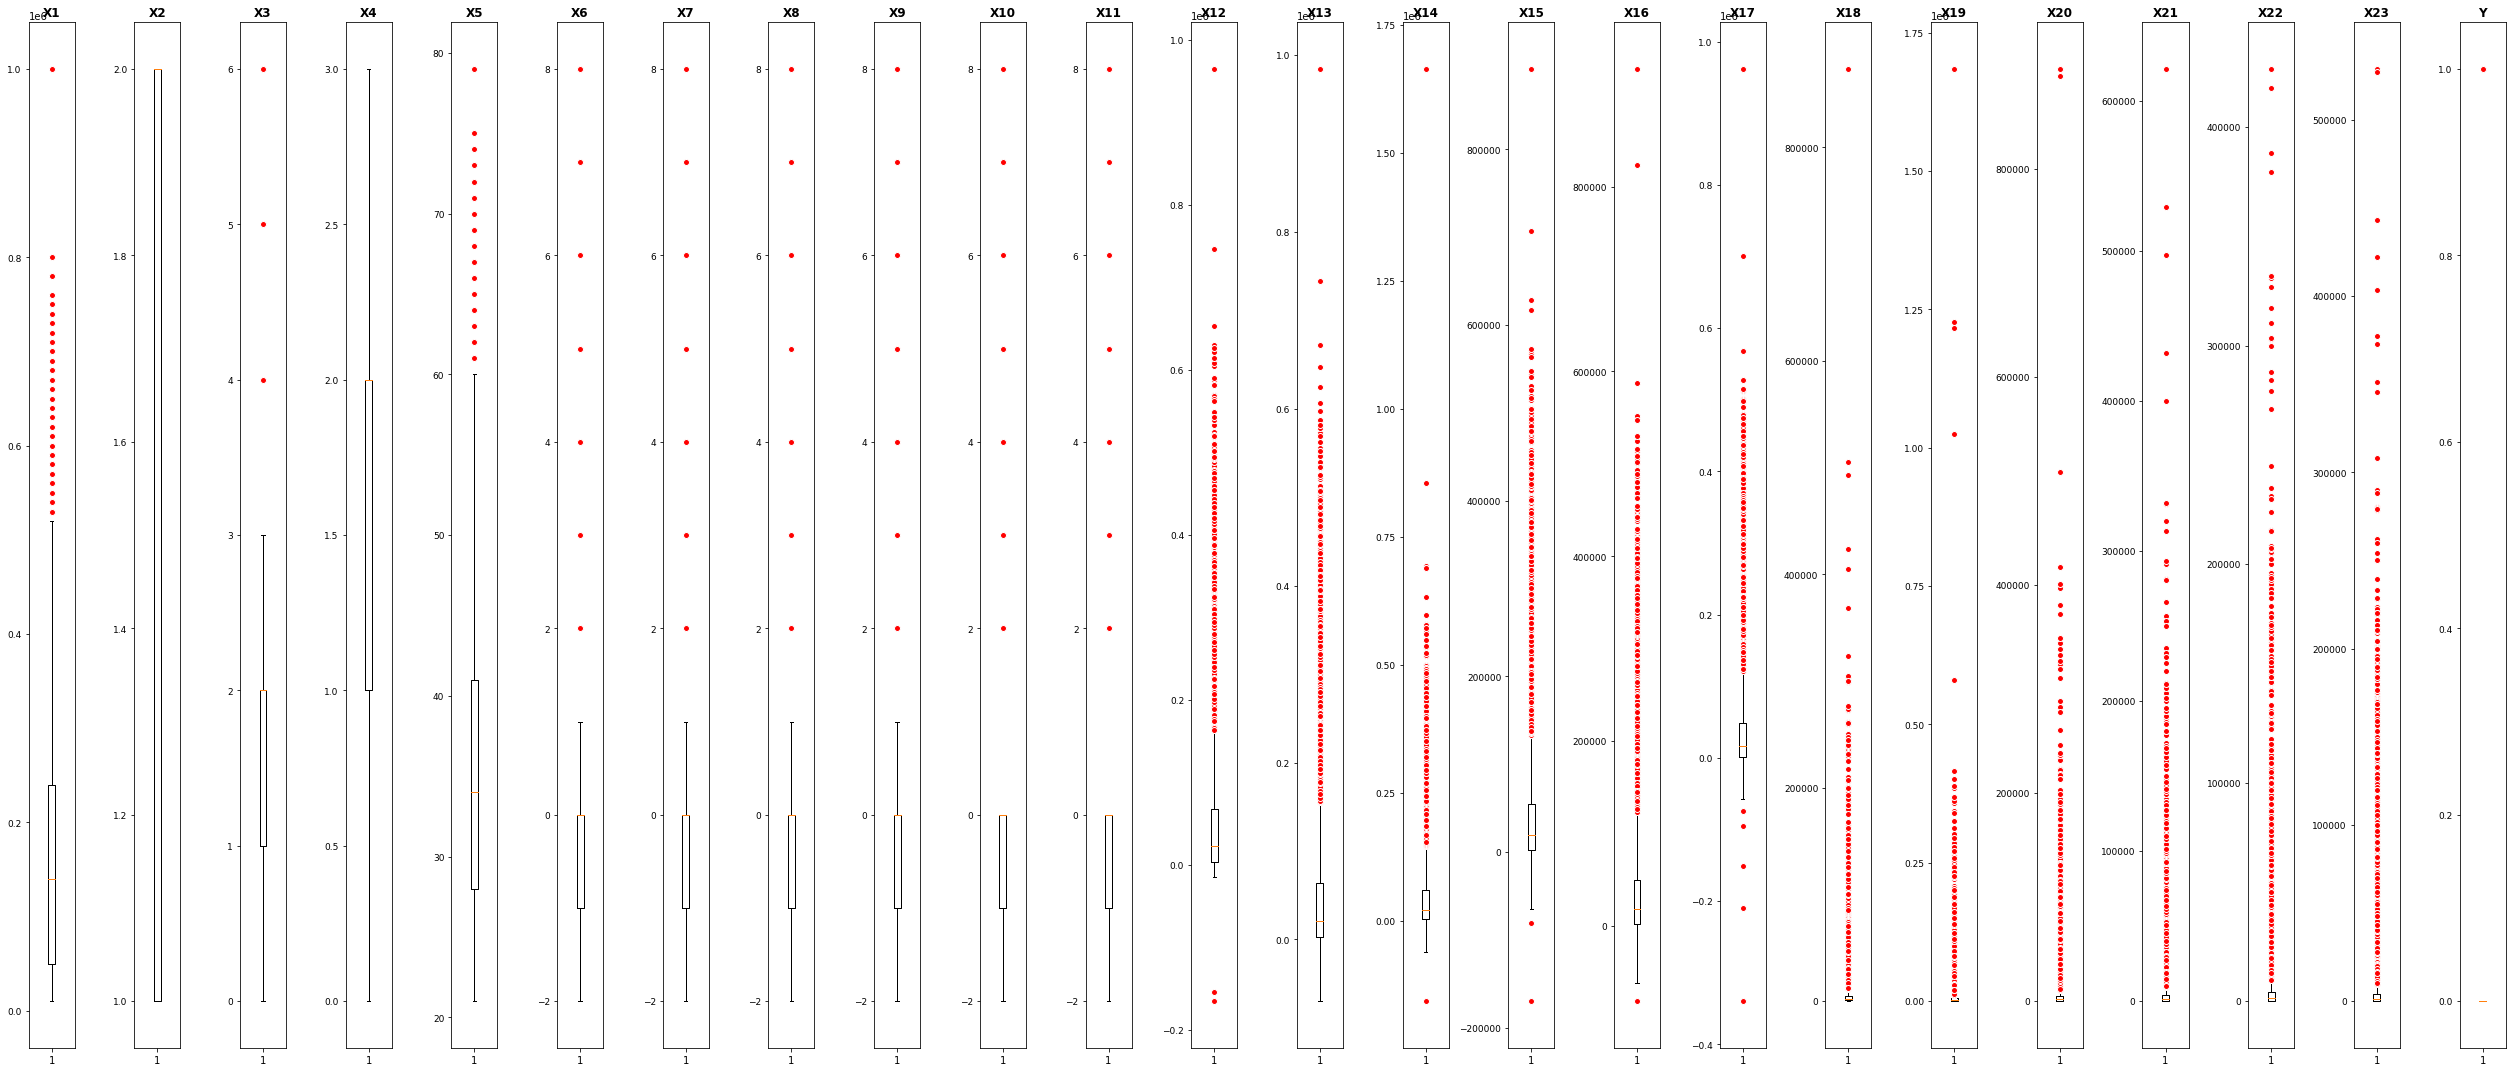

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df.columns), figsize=(35,15))

for i, ax in enumerate(axs.flat):
  ax.boxplot(df.iloc[:,i], flierprops=red_circle)
  df.iloc[:,i] #df.iloc[:, [0,2,1]]   Primera, tercera y segunda columnas
  ax.set_title(df.columns[i], fontsize=12, fontweight='bold')
  ax.tick_params(axis='y', labelsize=9)

plt.tight_layout()


En la gráfica anterior podemos observar que se tienen valores categóricos de X2 a X5, por lo cual no se van a observar outliers para estas variables.
Además, se percibe que en el resto de los atributos si se tienen outliers, se marcaron en color rojo todos los puntos fuera del rango máximo para definir el rango con el cual se puede tratar este tipo de datos.

##Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook

<br>

1. ¿Cuál es el número de componentes mínimo y por qué?<br>

El número de componentes mínimo es 12, ya que en los primeros 12 valores después de PCA se tiene el 87% de la varianza acumulada por lo que los siguientes componentes después de estos tienen menos importancia. En comparación, si no se hubiera utilizado PCA, para obtener ese porcentaje se habría tenido que utilizar 21 variables. 

2. ¿Cuál es la variación de los datos que representan esos componentes?<br>

Estos datos tienen una varianza acumulada de 87% por lo que se tiene la mayor parte contenida de los datos dentro de estos. 

3. ¿Cuál es la pérdida de información después de realizar PCA?<br>

La pérdida de información después de realizar PCA es nula, debido a que los datos sólo fueron transformados mas no borrados, como se ve observa arriba la varianza total antes y después de PCA es el mismo valor por lo que con esto se puede comprobar que no hay pérdidas.

4. De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?<br>

La variable original que tiene mayor importancia es X17 ya que como se muestra arriba, es la que más impacto tiene en 3 de los 12 componentes utilizados, por otro lado, las que tienen menor importancia son las variables de X1 a X4 que no se muestran en absoluto dentro de los valores máximos de los componentes.

5. ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?<br>

El análisis de componentes principales (PCA) se recomienda usarlo cuando se tiene un modelo de datos que contiene varias dimensiones, ya que lo que ofrece este algoritmo es la reducción de la dimensionalidad del conjunto de datos sin perder una cantidad significativa de datos.